<a href="https://colab.research.google.com/github/larissamazzero/RMN/blob/main/PLS/pls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Partial Least Squares Regression (PLS)

##Definição

A **Regressão Parcial de Mínimos Quadrados** (PLS) é uma técnica com o objetivo de diminuir o número de preditores a um conjunto menor de componentes, no lugar dos dados originais. A regressão PLS vem sendo muito utilizada devido a sua capacidade de operar com grandes números de variáveis correlacionadas e que são afetadas por ruído, diferentemente do OLS (Ordinary Least Squares), que gera coeficientes com erros altos ou que falham totalmente ao aplicados no mesmo conjunto de dados.

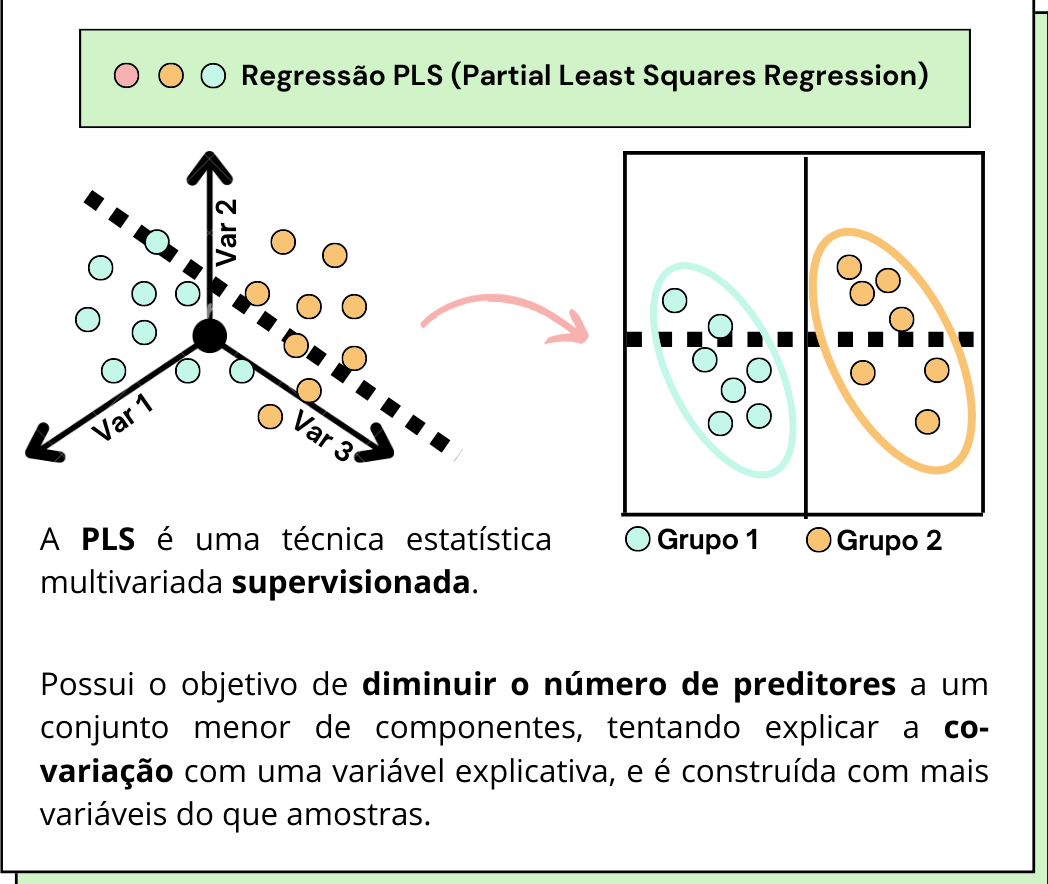

##Casos de uso

A Regressão PLS é usada em diversos setores, tais como químico, farmacêutico, plastíco e, no nesse caso, com enfase no **alimentício**. Uma aplicação consiste em realizar uma modelagem entre as medidas espectrais (NIR, IR e UV), essas que costumam possuir **muitas variáveis correlacionadas entre si**. 

Na indústria alimentícia, por exemplo, amostras de carne podem ser analisadas em relação ao seu teor de gordura, e o espectro NIR é utilizado para prever a concentração de gordura. Similares aplicações ocorrem na agricultura, onde é possível determinar as **propriedades dos grãos**.

##Funcionamento

* **PCA** é utilizado quando se quer melhorar a **análise estatística** de variaveis **altamente correlacionadas**, no entanto se as variáveis forem utilizadas como **explicativas ou independentes** na análise de regressão linear, **PLS** é a melhor alternativa.

A regressão PLS relaciona a matriz X (composta por variáveis de processo x) à matriz Y (composta por variáveis de produto y), permitindo analisar dados com alta correlação, elevados níveis de ruído e desequilíbrio entre o número de variáveis e observações. Tal regressão gera um conjunto de parâmetros que fornecem informações sobre a estrutura e comportamento de X e Y, o que corrobora para sua ampla aplicação em procedimentos de seleção de variáveis.

 

1.   Dividir o dataset em conjuntos de treino e teste;
  * Padronizar tanto as variáveis preditoras quanto as de resposta.

2.   Aplicar a regressão PLS no conjunto de treino e gerar índices de importência das variáveis;
  * Calcular M combinações lineares (chamadas de "componentes PLS") das variáveis preditoras p originais que explicam uma quantidade significativa de variação tanto na variável de resposta quanto nas variáveis preditoras.
  * Use o método dos mínimos quadrados para se ajustar a um modelo de regressão linear usando os componentes PLS como preditores.

3. Predizer a variável de resposta y para o conjunto de treino e eliminar as variáveis irrelevantes e ruidosas;

4. Construir um gráfico para identificar o melhor subconjunto de variáveis e testar essas variáveis no conjunto de teste;

  * Use a validação cruzada k-fold para encontrar o número ideal de componentes PLS para manter no modelo.

5. Comparar o desempenho dos índices de importância e identificar o melhor método para a seleção de variáveis;


##Requisitos

* As variáveis dependentes e independentes devem ter uma relação linear.
* As variáveis independentes não estão todas altamente correlacionadas. 
* Verifique a multicolinearidade usando uma matriz de correlação.
* Os outliers são tratados adequadamente, pois podem ter um forte impacto nos resultados. Verifique os valores aberrantes usando um gráfico de dispersão ou outros gráficos.
* Os dados seguem uma distribuição normal multivariada. Verifique a normalidade usando um teste de adequação.

##Exemplo de aplicação

In [ ]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Carregando o dataset
data = pd.read_csv("/content/peach_spectra_brix.csv")

In [ ]:
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [ ]:
#Separando entre preditores (X, dados de treino) e resposta (y, target)
y = data['Brix'].values
X = data.values[:, 1:]

In [ ]:
y.shape

(50,)

In [ ]:
X.shape

(50, 600)

In [ ]:
#Visualizando quantidade de dados de treino.
wl = np.arange(1100, 2300, 2)
print(len(wl))

600


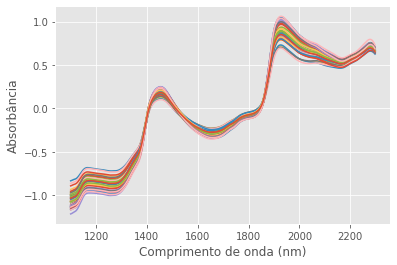

In [ ]:
with plt.style.context('ggplot'):
    plt.plot(wl, X.T)
    plt.xlabel("Comprimento de onda (nm)")
    plt.ylabel("Absorbância")

In [ ]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)

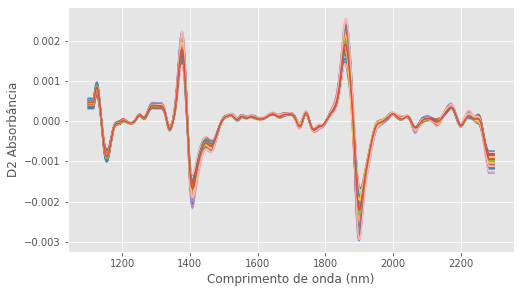

In [ ]:
#Plotando o gráfico.
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X2.T)
    plt.xlabel("Comprimento de onda (nm)")
    plt.ylabel("D2 Absorbância")
    plt.show()

In [ ]:
#Função PLS
def optimise_pls_cv(X, y, n_comp):
    #Definindo o objeto PLS
    pls = PLSRegression(n_components=n_comp)

    #Validação cruzada 
    y_cv = cross_val_predict(pls, X, y, cv=10)

    #Avaliando resultado
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
#Teste com 40 componentes.
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [ ]:
#Plotando MSES (média de erro quadrática)
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Número de componentes PLS')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

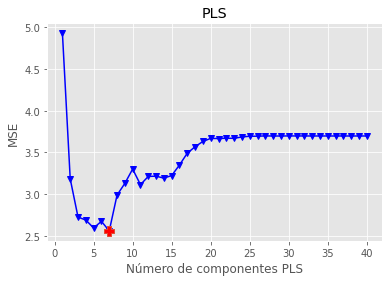

In [ ]:
plot_metrics(mses, 'MSE', 'min')

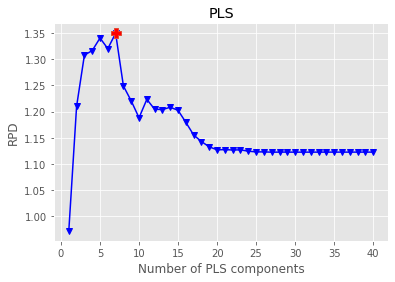

In [ ]:
plot_metrics(rpds, 'RPD', 'max')

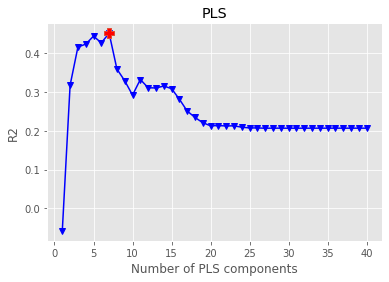

In [ ]:
plot_metrics(r2s, 'R2', 'max')

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [ ]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.4509, MSE: 2.5585, RPD: 1.3495


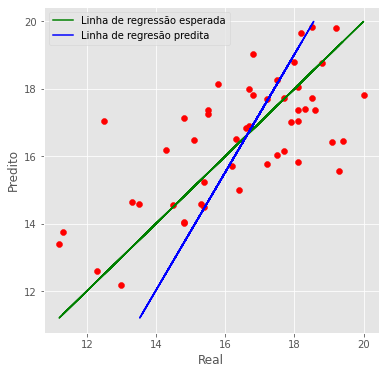

In [ ]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Linha de regressão esperada')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Linha de regresão predita')
    plt.xlabel('Real')
    plt.ylabel('Predito')
    plt.legend()
    plt.plot()

## Aplicando PLS Regression aos dados simulados

In [1]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carregando todos os datasets
header = pd.read_csv("/content/EixoTempoCPMG.csv", sep=";", header=None)

X_300 = pd.read_csv("/content/x_300_900.csv", sep=";", header=None)
X_400 = pd.read_csv("/content/x_400_800.csv", sep=";", header=None)
X_500 = pd.read_csv("/content/x_500_700.csv", sep=";", header=None)
X_550 = pd.read_csv("/content/x_550_650.csv", sep=";", header=None)
X_575 = pd.read_csv("/content/x_575_625.csv", sep=";", header=None)
X_595 = pd.read_csv("/content/x_595_605.csv", sep=";", header=None)

y_300 = pd.read_csv("/content/y_300_900.csv", sep=";", header=None)
y_400 = pd.read_csv("/content/y_400_800.csv", sep=";", header=None)
y_500 = pd.read_csv("/content/y_500_700.csv", sep=";", header=None)
y_550 = pd.read_csv("/content/y_550_650.csv", sep=";", header=None)
y_575 = pd.read_csv("/content/y_575_625.csv", sep=";", header=None)
y_595 = pd.read_csv("/content/y_595_605.csv", sep=";", header=None)

In [3]:
# Verificando se todos tem a mesma quantidade de linhas e colunas (precisam estar no mesmo padrão)
print("Linhas e colunas de cada dataset\n")
print(f"300:{X_300.shape}")
print(f"400:{X_400.shape}")
print(f"500:{X_500.shape}")
print(f"550:{X_550.shape}")
print(f"575:{X_575.shape}")
print(f"595:{X_595.shape}")

Linhas e colunas de cada dataset

300:(200, 1000)
400:(200, 1000)
500:(200, 1000)
550:(200, 1000)
575:(200, 1000)
595:(200, 1000)


In [4]:
# Unindo todos os datasets em um único
X = pd.concat([X_300, X_400, X_500, X_550, X_575, X_595], ignore_index=True)

In [5]:
X.shape

(1200, 1000)

In [6]:
# Função de tratamento para strings
def trat(valor):
  novo_valor = float(valor.replace(',','.'))
  return novo_valor

In [7]:
# Transformando todos os números com vírgula para ponto (padrão de float)
for c in X.columns:
  X[c] = X[c].map(trat)

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.02630,1.00240,0.96626,0.91791,0.90853,0.93514,0.86187,0.85487,0.89303,0.87825,...,-0.018016,-0.074208,-0.005763,0.009429,0.011988,-0.000266,-0.009849,0.016474,0.008462,-0.011176
1,0.99501,1.01710,0.94611,0.94201,0.96298,0.93375,0.90011,0.88143,0.88831,0.86173,...,-0.006913,-0.005034,0.014235,-0.019867,-0.015519,0.023895,0.034175,0.015894,0.007992,-0.022061
2,0.99625,0.95945,0.96944,0.93008,0.94138,0.92434,0.89822,0.90143,0.87551,0.89345,...,0.007359,0.018003,0.004721,-0.014393,0.000075,-0.009001,0.007342,-0.006471,-0.019042,0.014135
3,1.02180,0.97137,0.98042,0.94549,0.95157,0.90860,0.89975,0.87050,0.86984,0.87433,...,-0.042042,-0.025553,0.040491,-0.004555,-0.010410,0.007001,0.014060,-0.001308,0.006631,-0.021507
4,0.99148,0.95813,0.91988,0.95906,0.91476,0.93227,0.91805,0.86290,0.87754,0.86395,...,-0.005368,-0.032268,0.003669,-0.001698,0.006338,-0.014894,0.015431,-0.007368,-0.012907,-0.018560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.99530,0.99240,1.00880,0.99902,0.99162,0.95081,0.91816,0.97200,0.93288,0.93125,...,0.019526,0.001064,-0.003217,-0.006199,-0.010592,-0.008995,0.031090,0.024049,-0.029313,-0.000778
1196,1.03530,0.98333,0.96605,0.95379,0.94529,0.99235,0.93367,0.96080,0.97182,0.90198,...,-0.011607,0.021339,-0.020287,-0.003194,-0.017019,-0.000584,0.005026,-0.001873,-0.016099,0.017260
1197,0.97303,0.98100,0.97341,0.96196,0.96436,0.94791,0.95222,0.93746,0.95142,0.91356,...,0.019068,0.003229,0.000756,0.025887,0.015267,-0.009671,0.022662,0.003807,-0.020420,0.017556
1198,0.99925,0.97803,0.97036,0.96693,0.97034,0.97368,0.95806,0.93669,0.94731,0.92745,...,-0.001438,-0.004181,-0.013618,0.034619,0.017528,0.006295,-0.052793,0.009437,-0.001848,-0.000113


In [9]:
# Verificando se todos tem a mesma quantidade de linhas e colunas (precisam estar no mesmo padrão)
print("Linhas e colunas de cada label\n")
print(f"300:{y_300.shape}")
print(f"400:{y_400.shape}")
print(f"500:{y_500.shape}")
print(f"550:{y_550.shape}")
print(f"575:{y_575.shape}")
print(f"595:{y_595.shape}")

Linhas e colunas de cada label

300:(200, 1)
400:(200, 1)
500:(200, 1)
550:(200, 1)
575:(200, 1)
595:(200, 1)


In [10]:
# Unindo todos as labels em uma série única
y = pd.concat([y_300, y_400, y_500, y_550, y_575, y_595], ignore_index=True)

In [11]:
y.shape

(1200, 1)

In [12]:
header.head()

,0
0,0
1,5
2,10
3,15
4,20


In [13]:
header.shape

(1000, 1)

In [14]:
# Criando uma lista com os valores do eixo tempo para transformar no nome das colunas
headers = header[0].tolist()

In [15]:
# Criando o dataframe final
data = pd.DataFrame(data=X.values, columns=headers)

In [16]:
data.head()

,0,5,10,15,20,25,30,35,40,45,...,4950,4955,4960,4965,4970,4975,4980,4985,4990,4995
0,1.02630,1.00240,0.96626,0.91791,0.90853,0.93514,0.86187,0.85487,0.89303,0.87825,...,-0.018016,-0.074208,-0.005763,0.009429,0.011988,-0.000266,-0.009849,0.016474,0.008462,-0.011176
1,0.99501,1.01710,0.94611,0.94201,0.96298,0.93375,0.90011,0.88143,0.88831,0.86173,...,-0.006913,-0.005034,0.014235,-0.019867,-0.015519,0.023895,0.034175,0.015894,0.007992,-0.022061
2,0.99625,0.95945,0.96944,0.93008,0.94138,0.92434,0.89822,0.90143,0.87551,0.89345,...,0.007359,0.018003,0.004721,-0.014393,0.000075,-0.009001,0.007342,-0.006471,-0.019042,0.014135
3,1.02180,0.97137,0.98042,0.94549,0.95157,0.90860,0.89975,0.87050,0.86984,0.87433,...,-0.042042,-0.025553,0.040491,-0.004555,-0.010410,0.007001,0.014060,-0.001308,0.006631,-0.021507
4,0.99148,0.95813,0.91988,0.95906,0.91476,0.93227,0.91805,0.86290,0.87754,0.86395,...,-0.005368,-0.032268,0.003669,-0.001698,0.006338,-0.014894,0.015431,-0.007368,-0.012907,-0.018560


In [17]:
# Adicionando a coluna "label" com os valores de y
data["label"] = y

In [18]:
data

,0,5,10,15,20,25,30,35,40,45,...,4955,4960,4965,4970,4975,4980,4985,4990,4995,label
0,1.02630,1.00240,0.96626,0.91791,0.90853,0.93514,0.86187,0.85487,0.89303,0.87825,...,-0.074208,-0.005763,0.009429,0.011988,-0.000266,-0.009849,0.016474,0.008462,-0.011176,300
1,0.99501,1.01710,0.94611,0.94201,0.96298,0.93375,0.90011,0.88143,0.88831,0.86173,...,-0.005034,0.014235,-0.019867,-0.015519,0.023895,0.034175,0.015894,0.007992,-0.022061,300
2,0.99625,0.95945,0.96944,0.93008,0.94138,0.92434,0.89822,0.90143,0.87551,0.89345,...,0.018003,0.004721,-0.014393,0.000075,-0.009001,0.007342,-0.006471,-0.019042,0.014135,300
3,1.02180,0.97137,0.98042,0.94549,0.95157,0.90860,0.89975,0.87050,0.86984,0.87433,...,-0.025553,0.040491,-0.004555,-0.010410,0.007001,0.014060,-0.001308,0.006631,-0.021507,300
4,0.99148,0.95813,0.91988,0.95906,0.91476,0.93227,0.91805,0.86290,0.87754,0.86395,...,-0.032268,0.003669,-0.001698,0.006338,-0.014894,0.015431,-0.007368,-0.012907,-0.018560,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.99530,0.99240,1.00880,0.99902,0.99162,0.95081,0.91816,0.97200,0.93288,0.93125,...,0.001064,-0.003217,-0.006199,-0.010592,-0.008995,0.031090,0.024049,-0.029313,-0.000778,605
1196,1.03530,0.98333,0.96605,0.95379,0.94529,0.99235,0.93367,0.96080,0.97182,0.90198,...,0.021339,-0.020287,-0.003194,-0.017019,-0.000584,0.005026,-0.001873,-0.016099,0.017260,605
1197,0.97303,0.98100,0.97341,0.96196,0.96436,0.94791,0.95222,0.93746,0.95142,0.91356,...,0.003229,0.000756,0.025887,0.015267,-0.009671,0.022662,0.003807,-0.020420,0.017556,605
1198,0.99925,0.97803,0.97036,0.96693,0.97034,0.97368,0.95806,0.93669,0.94731,0.92745,...,-0.004181,-0.013618,0.034619,0.017528,0.006295,-0.052793,0.009437,-0.001848,-0.000113,605


In [19]:
# Todos os labels únicos
data["label"].unique()

array([300, 900, 400, 800, 500, 700, 550, 650, 575, 625, 595, 605])

### Encontrando o melhor número de componentes

In [20]:
# Separando entre preditores (X, dados de treino) e resposta (y, target)
y = data['label'].values
X = data.values[:, :-1]

In [21]:
y.shape

(1200,)

In [22]:
X.shape

(1200, 1000)

In [23]:
# Função PLS
def optimise_pls_cv(X, y, n_comp):
    # Definindo o objeto PLS
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)

    # Validação cruzada 
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Avaliando resultado
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [24]:
# Teste com 10 componentes.
r2s = []
mses = []
rpds = []
components = np.arange(1, 11)

for n_comp in components:
    y_cv, r2, mse, rpd = optimise_pls_cv(X, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [27]:
# Plotando as métricas de validação
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(components, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(components[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Número de componentes PLS')
        plt.xticks = components
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

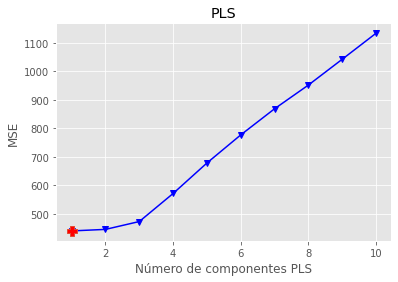

In [28]:
"""
O Erro Quadrático Médio (MSE) dá um maior peso aos maiores erros já que, 
ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.
Quanto menor o MSE significa que o modelo tem menos erros.
"""
plot_metrics(mses, 'MSE', 'min')

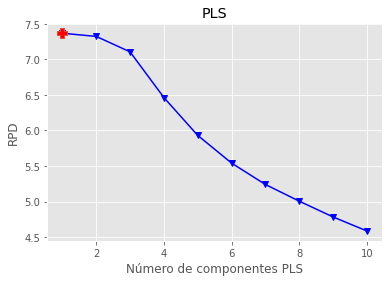

In [29]:
"""
Desvio de previsão residual (PPD) definido como o desvio padrão dos valores observados dividido pela Raiz do Erro Quadrático Médio ou Previsão (RMSEP). 
O RDP leva em consideração o erro de previsão e a variação dos valores observados, fornecendo uma métrica de validade do modelo mais objetiva do que o RMSEP e mais facilmente comparável entre os estudos de validação do modelo. 
Quanto maior o RPD, melhor a capacidade preditiva do modelo.
"""
plot_metrics(rpds, 'RPD', 'max')

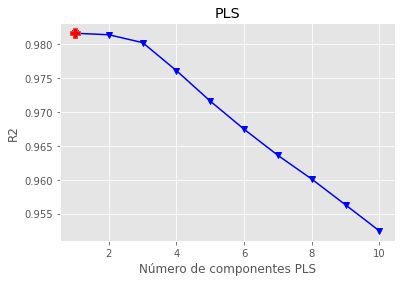

In [30]:
"""
R2 representa a porcentagem de variação na resposta que é explicada pelo modelo. 
Ele é calculado como 1 menos a razão da soma dos quadrados dos erros (que é a variação que não é explicada pelo modelo) para a soma total dos quadrados (que é a variação total no modelo).
Quanto mais alto o valor de R2 melhor o modelo ajusta seus dados. O valor de R2 está sempre entre 0 e 100%.
"""
plot_metrics(r2s, 'R2', 'max')

In [34]:
import statistics

# Escolhendo o melhor número de componente
best_metrics = []

# Mínimo do MSE
msemin = np.argmin(mses)
best_metrics.append(msemin+1)
# Máximo do RPD
rpdmax = np.argmax(rpds)
best_metrics.append(rpdmax+1)
# Máximo do R2
r2max = np.argmax(r2s)
best_metrics.append(r2max+1)

# Pegando a moda (número que mais se repete)
best_component = statistics.mode(best_metrics)
print(f"O melhor número de componente(s) para esses dados é: {best_component}")

O melhor número de componente(s) para esses dados é: 1


In [35]:
# Rodando novamente o PLS mas com número ideal de componentes
y_cv, r2, mse, rpd = optimise_pls_cv(X, y, best_component)

print(' Os novos valores são R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

 Os novos valores são R2: 0.9816, MSE: 439.5010, RPD: 7.3678


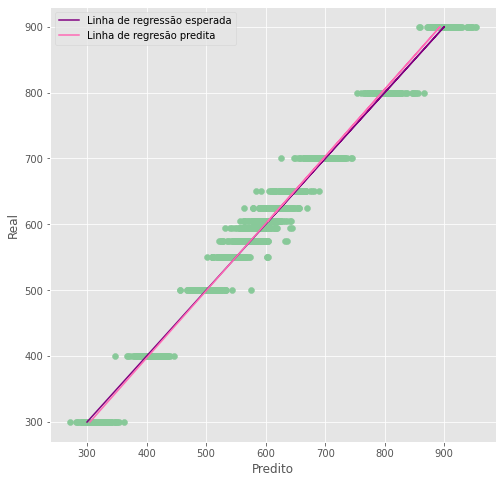

In [69]:
plt.figure(figsize=(8, 8))
with plt.style.context('ggplot'):
    plt.scatter(y_cv, y, color='#88c999')
    plt.plot(y, y, 'purple', label='Linha de regressão esperada')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='hotpink', label='Linha de regresão predita')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.legend()
    plt.plot()

In [50]:
# Criando um dataframe de resposta para visualização
response = pd.DataFrame(data=y_cv, columns=["output"])
response["label"] = y

In [53]:
response

,output,label
0,295.203041,300
1,337.781947,300
2,347.661280,300
3,312.057579,300
4,314.025469,300
...,...,...
1195,584.036783,605
1196,626.170792,605
1197,591.488214,605
1198,587.970093,605


In [73]:
import plotly.express as px

fig = px.scatter(response, x=response["output"], y=response["label"], color="label", trendline="ols", width=700, height=600, title="PLS nas Amostras")
fig.update_layout(title_x=0.5, yaxis_range=[200, 1000], xaxis_range=[200, 1000])
fig.show()